<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4967 non-null   datetime64[ns]
 1   Time                   3457 non-null   object        
 2   Location               4963 non-null   object        
 3   Operator               4957 non-null   object        
 4   Flight #               1315 non-null   object        
 5   Route                  4193 non-null   object        
 6   AC Type                4952 non-null   object        
 7   Registration           4694 non-null   object        
 8   cn/ln                  4299 non-null   object        
 9   Aboard                 4949 non-null   float64       
 10  Aboard Passangers      4738 non-null   float64       
 11  Aboard Crew            4741 non-null   float64       
 12  Fatalities             4959 non-null   float64       
 13  Fat

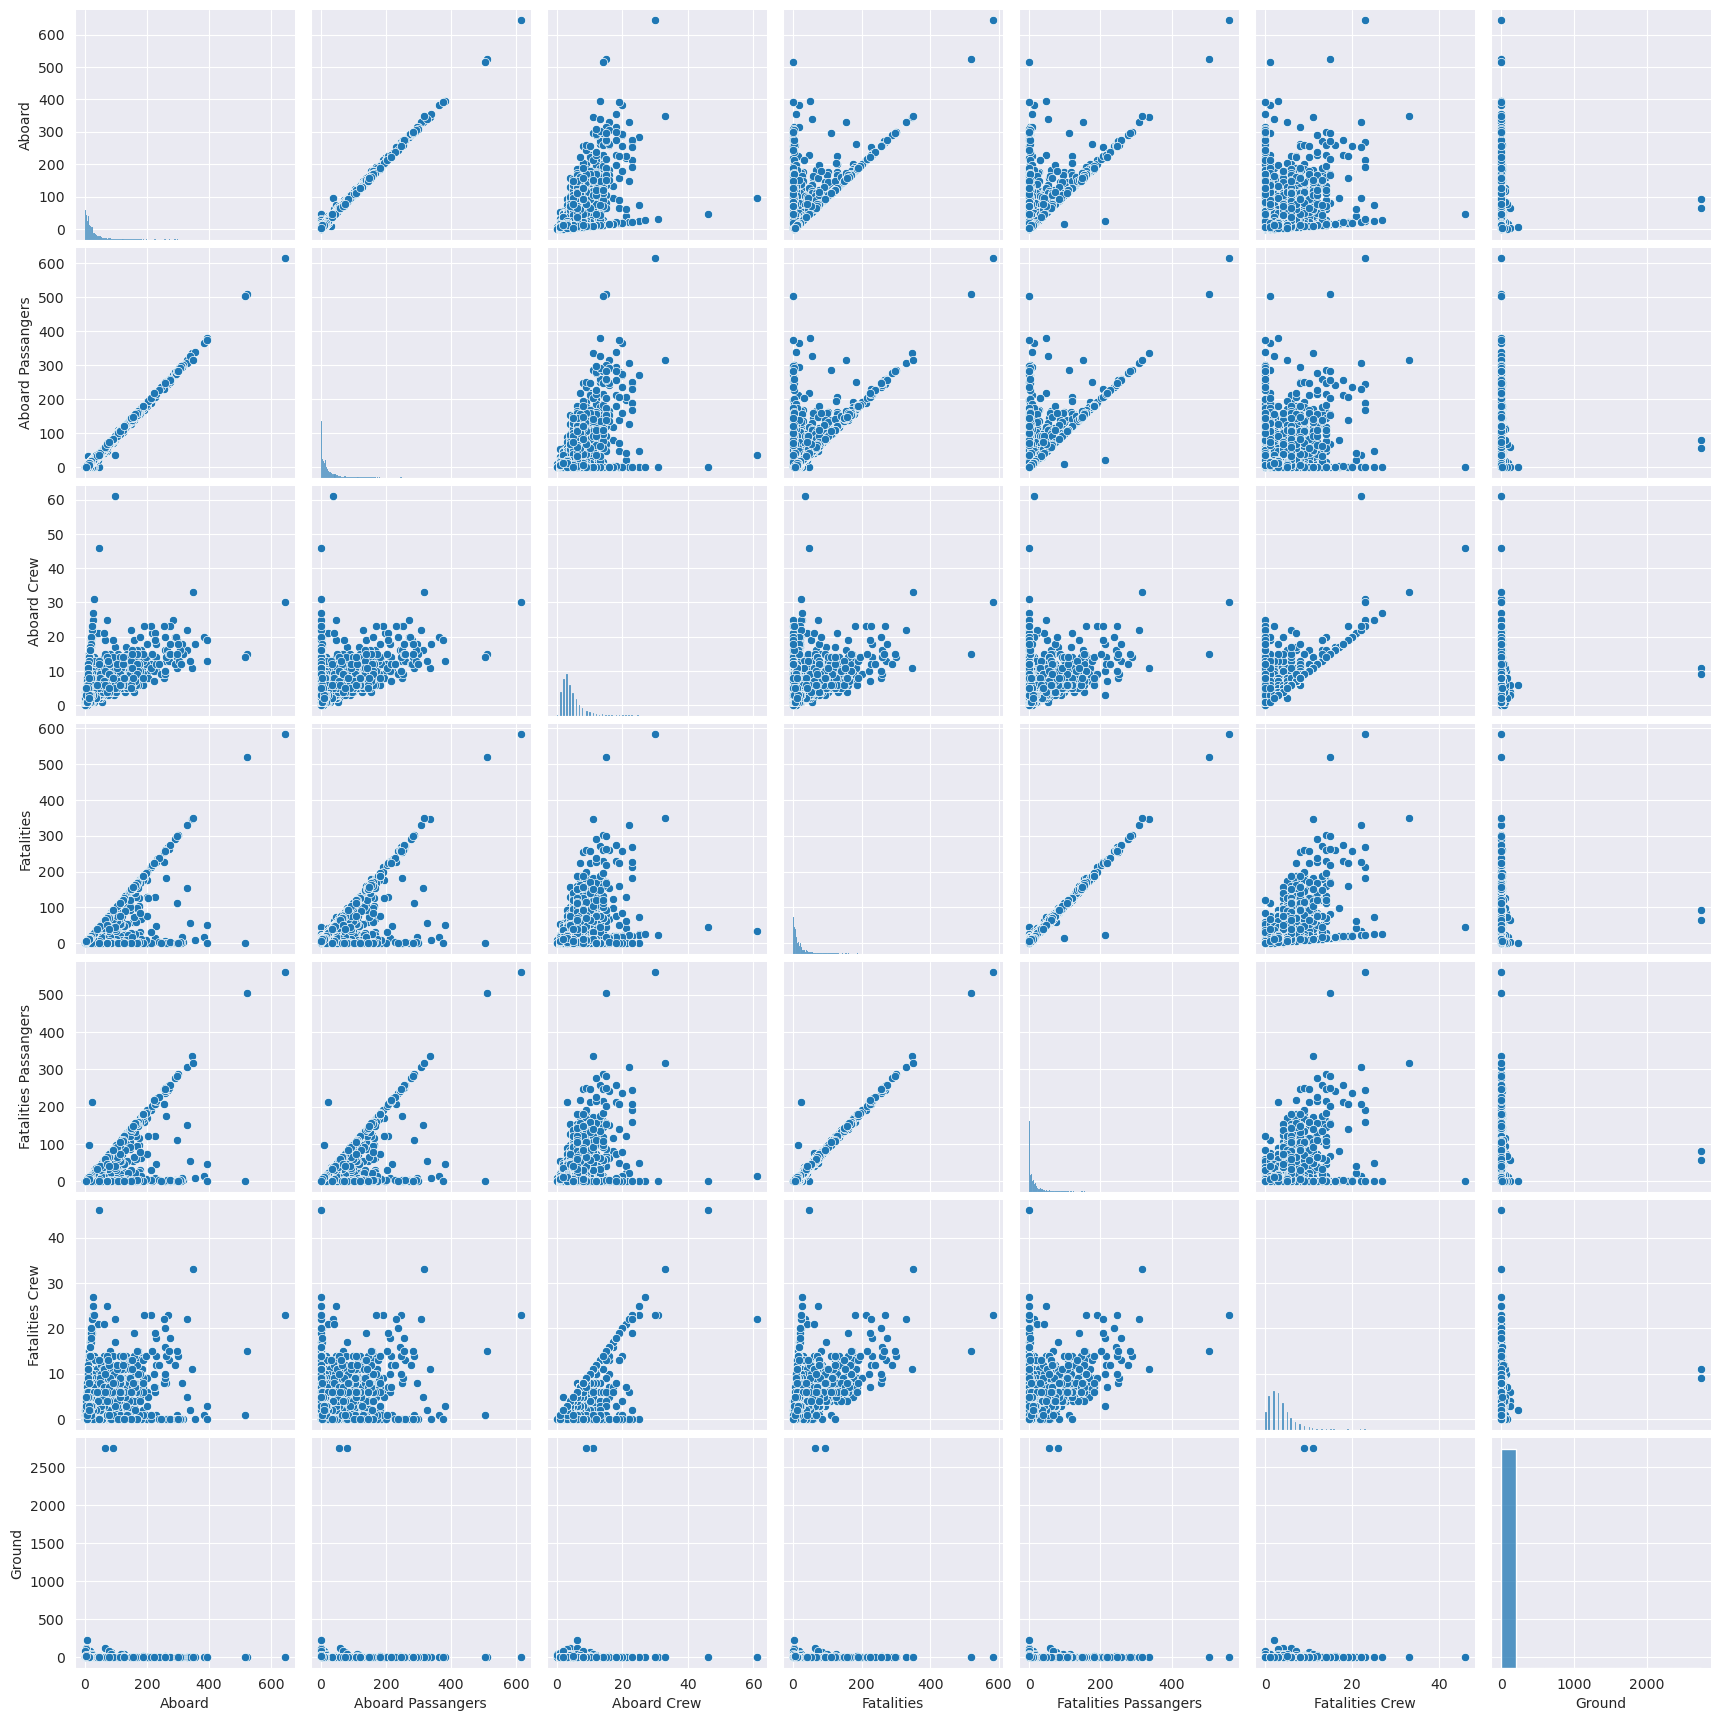

In [10]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv', parse_dates=["Date"])
df.info()
seaborn.pairplot(df)
plt.show()

In [20]:
number_of_clusters = 10
model = KMeans(n_clusters=number_of_clusters,
               init='k-means++',
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be

vectorizer = TfidfVectorizer(stop_words='english')
crash_description_vector = vectorizer.fit_transform(df["Summary"].dropna())
model.fit(crash_description_vector)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 engine
 takeoff
 crashed
 failure
 aircraft
 plane
 failed
 shortly
 right
 stalled
Cluster 1:
 weather
 conditions
 poor
 crashed
 vfr
 pilot
 adverse
 mountain
 flight
 approach
Cluster 2:
 en
 route
 crashed
 mountain
 disappeared
 cargo
 plane
 weather
 poor
 mountains
Cluster 3:
 fuel
 plane
 ran
 tank
 starvation
 engine
 aircraft
 engines
 running
 crashed
Cluster 4:
 landing
 emergency
 runway
 crashed
 plane
 make
 attempt
 aircraft
 engine
 pilot
Cluster 5:
 mountain
 flew
 struck
 crashed
 ft
 error
 aircraft
 000
 approach
 fog
Cluster 6:
 crashed
 aircraft
 approach
 plane
 flight
 pilot
 crew
 runway
 ground
 control
Cluster 7:
 taking
 shortly
 crashed
 plane
 engine
 aircraft
 minutes
 airport
 stalled
 lost
Cluster 8:
 attempting
 land
 crashed
 plane
 runway
 fog
 cargo
 airport
 heavy
 short
Cluster 9:
 cargo
 plane
 crashed
 runway
 struck
 takeoff
 lost
 engine
 mountain
 approach
